Importing Libraries

In [ ]:
# Imports and Downloads
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Ques 1

In [ ]:
paragraph = """
My favorite topic is artificial intelligence.  It's a fascinating field that blends computer science, mathematics, and cognitive psychology.  AI systems are constantly evolving, leading to remarkable advancements in areas like machine learning and natural language processing.  I'm particularly interested in how AI can be used to solve complex real-world problems, such as climate change or disease prediction.  The potential of AI is immense, and I believe it will shape the future of our world in profound ways.  Further research in AI ethics is critical to its responsible development and deployment.
"""
# 1. Convert to lowercase and remove punctuation
text = re.sub(r'[^\w\s]', '', paragraph.lower())
# 2. Tokenize into words and sentences
words = word_tokenize(text)
sentences = sent_tokenize(paragraph)
# 3. Compare split() and word_tokenize()
split_words = text.split()
print("Split words:", split_words[:20])
print("Word_tokenize:", words[:20])
print("Difference:", set(split_words) - set(words))
# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# 5. Word frequency distribution (excluding stopwords)
word_freq = FreqDist(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
word_freq.most_common() # Display top 10 most frequent words


Split words: ['my', 'favorite', 'topic', 'is', 'artificial', 'intelligence', 'its', 'a', 'fascinating', 'field', 'that', 'blends', 'computer', 'science', 'mathematics', 'and', 'cognitive', 'psychology', 'ai', 'systems']
Word_tokenize: ['my', 'favorite', 'topic', 'is', 'artificial', 'intelligence', 'its', 'a', 'fascinating', 'field', 'that', 'blends', 'computer', 'science', 'mathematics', 'and', 'cognitive', 'psychology', 'ai', 'systems']
Difference: set()

Word Frequency Distribution (excluding stopwords):


[('ai', 4),
 ('favorite', 1),
 ('topic', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('fascinating', 1),
 ('field', 1),
 ('blends', 1),
 ('computer', 1),
 ('science', 1),
 ('mathematics', 1),
 ('cognitive', 1),
 ('psychology', 1),
 ('systems', 1),
 ('constantly', 1),
 ('evolving', 1),
 ('leading', 1),
 ('remarkable', 1),
 ('advancements', 1),
 ('areas', 1),
 ('like', 1),
 ('machine', 1),
 ('learning', 1),
 ('natural', 1),
 ('language', 1),
 ('processing', 1),
 ('im', 1),
 ('particularly', 1),
 ('interested', 1),
 ('used', 1),
 ('solve', 1),
 ('complex', 1),
 ('realworld', 1),
 ('problems', 1),
 ('climate', 1),
 ('change', 1),
 ('disease', 1),
 ('prediction', 1),
 ('potential', 1),
 ('immense', 1),
 ('believe', 1),
 ('shape', 1),
 ('future', 1),
 ('world', 1),
 ('profound', 1),
 ('ways', 1),
 ('research', 1),
 ('ethics', 1),
 ('critical', 1),
 ('responsible', 1),
 ('development', 1),
 ('deployment', 1)]

Ques 2

In [ ]:
import pandas as pd
#1
words = re.findall(r'\b[a-zA-Z]+\b', text)
print(words)
#2
filtered_words = [word for word in words if word not in stop_words]
print(filtered_words)
ps = PorterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_words:
  porter_stem = ps.stem(word)
  lemma = lm.lemmatize(word)
  data.append([word, porter_stem, lemma])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "Lemmatizer Word"])
display(df)

['my', 'favorite', 'topic', 'is', 'artificial', 'intelligence', 'its', 'a', 'fascinating', 'field', 'that', 'blends', 'computer', 'science', 'mathematics', 'and', 'cognitive', 'psychology', 'ai', 'systems', 'are', 'constantly', 'evolving', 'leading', 'to', 'remarkable', 'advancements', 'in', 'areas', 'like', 'machine', 'learning', 'and', 'natural', 'language', 'processing', 'im', 'particularly', 'interested', 'in', 'how', 'ai', 'can', 'be', 'used', 'to', 'solve', 'complex', 'realworld', 'problems', 'such', 'as', 'climate', 'change', 'or', 'disease', 'prediction', 'the', 'potential', 'of', 'ai', 'is', 'immense', 'and', 'i', 'believe', 'it', 'will', 'shape', 'the', 'future', 'of', 'our', 'world', 'in', 'profound', 'ways', 'further', 'research', 'in', 'ai', 'ethics', 'is', 'critical', 'to', 'its', 'responsible', 'development', 'and', 'deployment']
['favorite', 'topic', 'artificial', 'intelligence', 'fascinating', 'field', 'blends', 'computer', 'science', 'mathematics', 'cognitive', 'psych

,Word,PorterStemmed Word,Lemmatizer Word
0,favorite,favorit,favorite
1,topic,topic,topic
2,artificial,artifici,artificial
3,intelligence,intellig,intelligence
4,fascinating,fascin,fascinating
5,field,field,field
6,blends,blend,blend
7,computer,comput,computer
8,science,scienc,science
9,mathematics,mathemat,mathematics


Ques 3

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#1
texts = ["Local Community Rallies Together to Clean Up Park After Severe Storm", "Product: Wireless Noise-Canceling Headphones", "Just finished reading 'The Midnight Library' by Matt Haig!"]
cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print("---------------------------------------------")
print(X.toarray())
#2
print("---------------------------------------------")
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print("---------------------------------------------")
print(tfidf_matrix.toarray())
print("---------------------------------------------")
#3
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]  # Sort indices in descending order
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print("---------------------------------------------")
    print(f"Top 3 keywords: {top_keywords}\n")

['after' 'by' 'canceling' 'clean' 'community' 'finished' 'haig'
 'headphones' 'just' 'library' 'local' 'matt' 'midnight' 'noise' 'park'
 'product' 'rallies' 'reading' 'severe' 'storm' 'the' 'to' 'together' 'up'
 'wireless']
---------------------------------------------
[[1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]]
---------------------------------------------
['after' 'by' 'canceling' 'clean' 'community' 'finished' 'haig'
 'headphones' 'just' 'library' 'local' 'matt' 'midnight' 'noise' 'park'
 'product' 'rallies' 'reading' 'severe' 'storm' 'the' 'to' 'together' 'up'
 'wireless']
---------------------------------------------
[[0.30151134 0.         0.         0.30151134 0.30151134 0.
  0.         0.         0.         0.         0.30151134 0.
  0.         0.         0.30151134 0.         0.30151134 0.
  0.30151134 0.30151134 0.         0.30151134 0.30151134 0.30151134
  0.  

Ques 4

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
A = """
Artificial Intelligence (AI) refers to the simulation of human intelligence in machines designed to think and learn like humans. AI technologies, such as machine learning and natural language processing, enable systems to analyze vast amounts of data, recognize patterns, and make decisions. From virtual assistants like Siri to advanced algorithms in healthcare, AI is revolutionizing industries by enhancing efficiency and enabling personalized experiences. Its potential continues to grow, shaping the future of work and daily life.
"""
B = """
Blockchain technology is a decentralized digital ledger that securely records transactions across multiple computers. Each block in the chain contains a set of transactions, and once added, it cannot be altered, ensuring transparency and security. This technology underpins cryptocurrencies like Bitcoin but has applications beyond finance, including supply chain management, healthcare, and voting systems. By providing a tamper-proof record of transactions, blockchain fosters trust and accountability in various sectors.
"""
# 1. Preprocess and Tokenize
texts1 = re.sub(r'[^\w\s]', '', A.lower())
print(texts1)
print("------------------------------------------------")
texts2 = re.sub(r'[^\w\s]', '', B.lower())
print(texts2)
print("------------------------------------------------")
text1 = set(texts1.split())
print(text1)
print("------------------------------------------------")
text2 = set(texts2.split())
print(text2)
print("------------------------------------------------")
# 3. Intersection
jaccard = len(text1.intersection(text2)) / len(text1.union(text2))
print("Jaccard Similarity:", jaccard)
print("------------------------------------------------")
tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform([texts1, texts2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])


artificial intelligence ai refers to the simulation of human intelligence in machines designed to think and learn like humans ai technologies such as machine learning and natural language processing enable systems to analyze vast amounts of data recognize patterns and make decisions from virtual assistants like siri to advanced algorithms in healthcare ai is revolutionizing industries by enhancing efficiency and enabling personalized experiences its potential continues to grow shaping the future of work and daily life

------------------------------------------------

blockchain technology is a decentralized digital ledger that securely records transactions across multiple computers each block in the chain contains a set of transactions and once added it cannot be altered ensuring transparency and security this technology underpins cryptocurrencies like bitcoin but has applications beyond finance including supply chain management healthcare and voting systems by providing a tamperproo

Ques 5

Review: The product is excellent!
Polarity: 1.0
Subjectivity: 1.0
Sentiment: Positive
------------------------------------------------
Review: Bad Service
Polarity: -0.6999999999999998
Subjectivity: 0.6666666666666666
Sentiment: Negative
------------------------------------------------
Review: Not good food
Polarity: -0.35
Subjectivity: 0.6000000000000001
Sentiment: Negative
------------------------------------------------
Review: Great service and quality.
Polarity: 0.8
Subjectivity: 0.75
Sentiment: Positive
------------------------------------------------
Review: Torn bedsheets and foul smell
Polarity: 0.0
Subjectivity: 0.0
Sentiment: Neutral
------------------------------------------------
Review: Highly recommended.
Polarity: 0.16
Subjectivity: 0.5399999999999999
Sentiment: Positive
------------------------------------------------


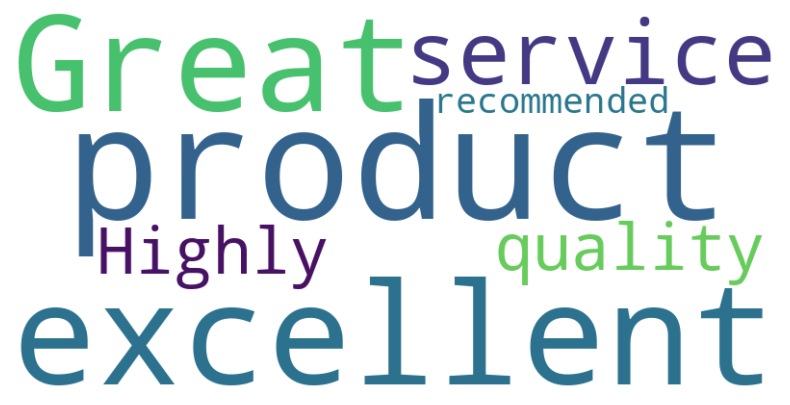

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#1
reviews = ["The product is excellent!","Bad Service", "Not good food" ,"Great service and quality.","Torn bedsheets and foul smell" ,"Highly recommended."]
positive_reviews = []
for(i,review) in enumerate(reviews):
  blob = TextBlob(review)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Review: {review}")
  print(f"Polarity: {polarity}")
  print(f"Subjectivity: {subjectivity}")
  if polarity > 0.1:
      sentiment = "Positive"
      positive_reviews.append(review)
  elif polarity < -0.1:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  print(f"Sentiment: {sentiment}")
  print("------------------------------------------------")

#3
all_positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Ques 6

In [ ]:
!pip install keras tensorflow

Import Libraries

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import random
# Import to_categorical
from tensorflow.keras.utils import to_categorical

# Paragraph
text = """Technology is evolving rapidly and impacting every area of our lives.
From communication to healthcare, artificial intelligence and automation are reshaping how we work and live.
As machines become smarter, human creativity and empathy will become even more valuable.
The future will likely be a partnership between humans and machines, where each complements the other’s strengths.
Preparing for this shift means investing in education, ethical frameworks, and lifelong learning.
With the right approach, we can build a future that is inclusive, innovative, and empowering for all generations to come."""

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split("."):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create features and labels
X = input_sequences[:,:-1]
y = input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words) # Now to_categorical is defined
print("--------------------------------------------------------------------")

model = Sequential()
# Change input_dim to total_words or a higher value
model.add(Embedding(input_dim=total_words, output_dim=10, input_length= input_sequences.shape[1]))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

print("--------------------------------------------------------------------------------")


def generate_lines(seed_text, total_lines=3, words_per_line=7):
    generated_text = ""
    current_seed = seed_text

    for _ in range(total_lines):
        line = ""
        for _ in range(words_per_line):
            token_list = tokenizer.texts_to_sequences([current_seed])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
            predicted = model.predict(token_list, verbose=0)
            predicted_word_index = np.argmax(predicted, axis=1)[0]

            output_word = ""
            for word, index in tokenizer.word_index.items():
                if index == predicted_word_index:
                    output_word = word
                    break

            # Handle out-of-vocabulary words
            if output_word == "":
                output_word = "[OOV]"  # Replace with a placeholder or handle differently

            current_seed += " " + output_word
            line += output_word + " "
        generated_text += line.strip() + "\n"

    return generated_text

# Try generating 3 lines of text from a seed word
seed = "Technology"
print(generate_lines(seed))

--------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------------------------------------
approach innovative and from and means from
means means and means complements complements complements
complements complements complements complements complements complements complements

